#### Fractal sobre un árbol.

In [1]:
# Importar librerias Necesarias.
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def divideSeg(segm, rz):
    x = segm.T
    xs = x[0]
    ys = x[1]
    
    x1 = (xs[0]+ rz*xs[1]) / (rz+1)
    y1 = (ys[0]+ rz*ys[1]) / (rz+1)
    
    return np.array([x1, y1])


def bifurca(segm, tet):
    x = segm.T
    xs = x[0]
    ys = x[1]
    
    a1 = xs[1] - xs[0]
    a2 = ys[1] - ys[0]
    nx = a1*np.cos(tet) - a2*np.sin(tet)
    ny = a1*np.sin(tet) + a2*np.cos(tet)
    
    return np.array([nx, ny])

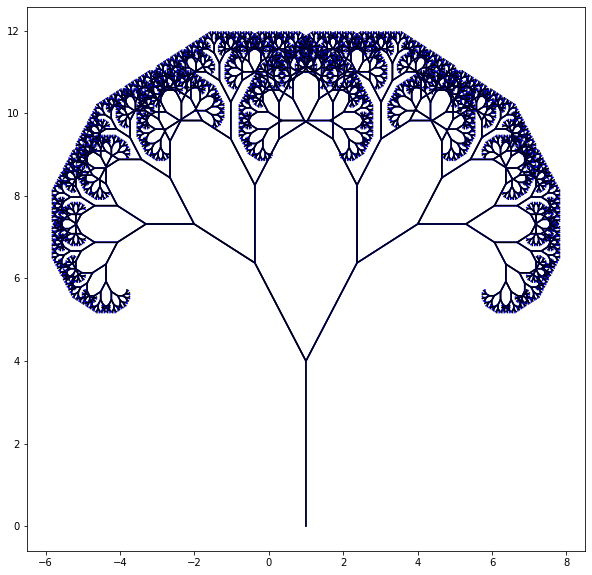

In [3]:
  
def Arbol(segmento, tet, cntos, propor, delta):
    segmentoDer = segmento
    segmentoIzq = segmento.copy()

    ptRotDer = bifurca(segmentoDer, -tet)
    nvSeg = np.array([segmentoDer[-1], ptRotDer+segmentoDer[-1]])
    ptDvdDer = divideSeg(nvSeg, propor*delta[cntos-1])
    nvSegDer = np.array([segmentoDer[-1], ptDvdDer])
    segmentoDer = np.append(segmentoDer, [ptDvdDer], axis=0)
    
    ptRotIzq = bifurca(segmentoIzq, tet)
    nvSeg = np.array([segmentoIzq[-1], ptRotIzq+segmentoIzq[-1]])
    ptDvdIzq = divideSeg(nvSeg, propor*delta[11-cntos])
    nvSegIzq = np.array([segmentoIzq[-1], ptDvdIzq])
    segmentoIzq = np.append(segmentoIzq, [ptDvdIzq], axis=0)

    plt.plot(*segmentoDer.T, c="blue")
    plt.plot(*segmentoIzq.T, c="black")
    
    if cntos > 0:
        Arbol(nvSegDer, tet, cntos-1, propor, delta)
        Arbol(nvSegIzq, tet, cntos-1, propor, delta)

delta = np.ones(12)
propor = 2.19
cntos = 11
teta = np.pi/6

plt.figure(figsize=(10, 10))
nvSeg = np.array([[1, 0], [1, 4]])
Arbol(nvSeg, teta, cntos, propor, delta)

plt.show()
